In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [2]:
csv = '2025_02.csv'
df = pd.read_csv(csv)

In [3]:
# Ver las primeras filas del DataFrame
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,43.0,5941349,255,31/01/2025,23:50:25,538,01/02/2025,00:00:09
1,M,29.0,8199374,021,31/01/2025,23:43:07,190,01/02/2025,00:00:13
2,M,22.0,7219819,552,31/01/2025,23:56:41,555,01/02/2025,00:00:15
3,F,46.0,5597208,128,31/01/2025,23:56:01,137,01/02/2025,00:00:23
4,M,23.0,5643887,384,31/01/2025,23:52:47,331,01/02/2025,00:00:24


In [26]:
# Número total de filas
num_filas = df.shape[0]
print(f'Número total de filas en el DataFrame: {num_filas}')

Número total de filas en el DataFrame: 1745620


In [4]:
# Convertir género a valores numéricos
le = LabelEncoder()
df['Genero_Usuario'] = le.fit_transform(df['Genero_Usuario'])  # M a 1, F a 0

In [5]:
# Crear una variable objetivo (1 si usó bicicleta de noche, 0 de lo contrario)
df['Usa_Bici_Noche'] = df['Hora_Retiro'].apply(lambda x: 1 if x >= '22:00:00' else 0)

In [6]:
# Seleccionar características y la variable objetivo
X = df[['Genero_Usuario', 'Edad_Usuario']]
y = df['Usa_Bici_Noche']


In [7]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f'Accuracy del modelo: {accuracy * 100:.2f}%')

Accuracy del modelo: 96.01%


In [10]:
# Realizar predicciones
predicciones = model.predict(X_test)
print(f'Predicciones: {predicciones}')

Predicciones: [0 0 0 ... 0 0 0]


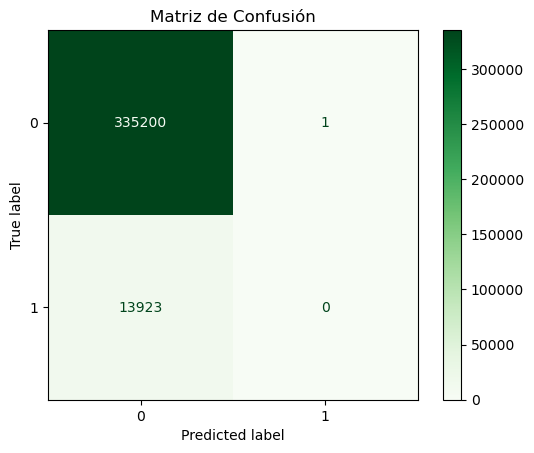

In [27]:
# Matriz de confusión
cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusión')
plt.show()

In [14]:
cm

array([[335200,      1],
       [ 13923,      0]])

In [19]:
# Calcular y mostrar el classification report
report = classification_report(y_test, predicciones)
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    335201
           1       0.00      0.00      0.00     13923

    accuracy                           0.96    349124
   macro avg       0.48      0.50      0.49    349124
weighted avg       0.92      0.96      0.94    349124



In [25]:
# Crear un DataFrame para la comparativa
comparativa_df = pd.DataFrame({
    'Real': y_test.reset_index(drop=True),    # Datos reales
    'Predicción': predicciones                 # Predicciones del modelo
})

# Texto explicativo sobre la tabla
print("Tabla de Comparación:")
print("Nota: En esta tabla, el valor '0' indica que el usuario NO usa la bicicleta de noche, "
      "mientras que el valor '1' indica que el usuario SÍ usa la bicicleta de noche.\n")

# Mostrar la tabla comparativa
comparativa_df.head(20)

Tabla de Comparación:
Nota: En esta tabla, el valor '0' indica que el usuario NO usa la bicicleta de noche, mientras que el valor '1' indica que el usuario SÍ usa la bicicleta de noche.



,Real,Predicción
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
